In [1]:
pwd

'/mnt/data/share/wq/soft/AI_LNP/input_csv/4CR_2'

In [2]:
import csv
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import random
import os
from IPython.display import display  # 用于在 Jupyter Notebook 中显示图片

In [3]:
import csv

def load_smiles_and_code_from_csv(filename):
    """
    从 CSV 文件中读取 SMILES 和编号（code），不依赖列号，而是依据列名读取。
    CSV 文件要求：
      - 包含列名，例如 "code" 和 "smiles"
    返回一个列表，每个元素为 (smiles, code) 的元组。
    """
    data = []
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # 根据列名读取对应的数据，注意区分大小写，可根据实际情况调整列名
            code = row.get('code') or row.get('Code') or row.get('CODE')
            smiles = row.get('smiles') or row.get('SMILES') or row.get('Smiles')
            if not code or not smiles:
                # 如果缺少任一数据则跳过该行
                continue
            data.append((smiles.strip(), code.strip()))
    return data

# 分别从各个 CSV 文件中读取数据，每个文件应包含 "code" 和 "smiles" 列
amine_head_list = load_smiles_and_code_from_csv('4CR-2-1_amines.csv')
isocyanide_linker_list = load_smiles_and_code_from_csv('4CR-2-1_isocyanides.csv')
Tail_1_list = load_smiles_and_code_from_csv('4CR-2-1_ketones.csv')
Tail_2_list = load_smiles_and_code_from_csv('4CR-2-1_carboxylic acids.csv')

# 打印读取的内容以确认加载正确
print("Amine Head:")
for smiles, code in amine_head_list:
    print(f"{code}: {smiles}")

print("\nIsocyanide Linker:")
for smiles, code in isocyanide_linker_list:
    print(f"{code}: {smiles}")

print("\nTail 1:")
for smiles, code in Tail_1_list:
    print(f"{code}: {smiles}")

print("\nTail 2:")
for smiles, code in Tail_2_list:
    print(f"{code}: {smiles}")


Amine Head:
a1: NCCN1CCCC1
a2: NCCN1CCCCC1
a3: CCC1CCCCN1CCCN
a4: NCCN1CCS(=O)(=O)CC1
a5: NC1CCN(CC2=CC=CC=C2)CC1
a6: NCCCN1C=CN=C1
a7: NCC1=CC=CN=C1
a8: NCCN1CCOCC1
a9: CN(C)CCN
a10: CN1CCN(CCCN)CC1
a11: NCCCN1CCCC1
a12: NCCCN1CCCCC1
a13: NCCCN1CCCCCC1
a14: NCCCN1CCOCC1
a15: NCCN1CCCCCC1
a16: CCC1CCCCN1CCN
a17: NCCN1C=NCC1
a18: CN1CCCN(CCN)CC1
a19: CN1C=CCN(CCCN)CC1
a20: NCCCN(CCO)CCO
a21: CCN(CC)CCCN
a22: CCCCN(CCCC)CCCN
a23: CN(C)CCCN
a24: NCCCN1CCN(CCCN)CC1
a25: CN(CCN)CCN
a26: CNCCCN
a27: CCCN(CCC)CCCN
a28: CC(C)N(CCCN)C(C)C
a29: CN(CCCN)CCCN
a30: NCCN(CCO)CCO
a31: NCCCNCO
a32: CN(CO)CCCN
a33: CN(C)CCCNCCCN
a34: NCCNCCNCCNCCN
a35: NCCCN1CCNCC1
a36: NCCCN1CCN(CCCO)CC1
a37: CN1CCC(N)CC1
a38: NCCCN1C=CC=N1
a39: NCCN1C=CC=N1
a40: CN(C)CCCCCN

Isocyanide Linker:
i1: [C-]#[N+]CC(=O)OC(C)(C)C
i2: [C-]#[N+]C(C)(C)C
i3: [C-]#[N+]C1CCCCC1
i4: [C-]#[N+]CCCC
i5: [C-]#[N+]CCCCCCCC/C=C\CCCCCCCC
i6: [C-]#[N+]CCCN(C)C
i7: [C-]#[N+]CCCN(CCCC)CCCC
i8: [C-]#[N+]CCCCCN(C)C
i9: [C-]#[N+]C12CC3CC(CC(C3

In [16]:
# =========================== 5. 定义处理及保存产物的函数，大量建库时候取消可视化以及循环检查点，反正输出溢出 ===========================
def process_and_save_products(product_tuples, step_name):
    """
    处理产品：
    1) 去重 & 转 SMILES（保留产品名称）
    2) 打印 SMILES 到控制台
    3) 输出有效产物到 CSV: f"{step_name}_products.csv"
    4) （可选）在 Notebook 中显示网格图
    5) 返回去重并检查后的有效产物及其名称列表
    """
    import csv
    from rdkit import Chem
    from rdkit.Chem import Draw
    from IPython.display import display

    if not product_tuples:
        print(f"[{step_name}] 没有产物生成.")
        return [], []

    # 1) 去重（根据 SMILES 去重，同时保留名称，保留第一次出现的名称）
    unique_dict = {}
    for mol, name in product_tuples:
        smi = Chem.MolToSmiles(mol, isomericSmiles=True)
        if smi not in unique_dict:
            unique_dict[smi] = name
    unique_smiles = list(unique_dict.keys())
    print(f"[{step_name}] 原产物数: {len(product_tuples)}, 去重后: {len(unique_smiles)}")

    # 2) 在控制台打印 SMILES 列表
    print(f"[{step_name}] 产物 SMILES 列表 (去重后):")
    for smi in unique_smiles:
        print("  ", smi)

    # 3) 转回 Mol，并进行 Sanitize 检查，同时收集有效产品的名称
    valid_mols = []
    valid_names = []
    invalid_smiles = []
    for smi in unique_smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            #print(f"[警告] 无法从 SMILES 解析: {smi}")
            invalid_smiles.append(smi)
            continue
        try:
            Chem.SanitizeMol(mol)
            valid_mols.append(mol)
            valid_names.append(unique_dict[smi])
        except Exception as e:
            print(f"[非法产物] SMILES: {smi} | 错误: {e}")
            invalid_smiles.append(smi)
    print(f"[{step_name}] Sanitize 检查后有效产物数: {len(valid_mols)}，非法产物数: {len(invalid_smiles)}")

    # 4) 保存有效产物 CSV（包括编号、名称和 SMILES）
    csv_filename = f"{step_name}_products.csv"
    with open(csv_filename, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["编号", "名称", "SMILES"])
        for idx, (mol, name) in enumerate(zip(valid_mols, valid_names), start=1):
            smi = Chem.MolToSmiles(mol, isomericSmiles=True)
            writer.writerow([idx, name, smi])
    print(f"[{step_name}] 有效产物 CSV 已保存: {csv_filename}")

    # 5) 保存非法产物 CSV（如果有）
    if invalid_smiles:
        invalid_csv_filename = f"{step_name}_invalid_products.csv"
        with open(invalid_csv_filename, "w", newline="", encoding="utf-8") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["SMILES"])
            for smi in invalid_smiles:
                writer.writerow([smi])
        print(f"[{step_name}] 非法产物 CSV 已保存: {invalid_csv_filename}")

    # 6) 在 Notebook 中显示网格图
    if valid_mols:
        img = Draw.MolsToGridImage(valid_mols, molsPerRow=4, subImgSize=(200, 200))
        display(img)
        # 如需保存图片，可启用如下代码：
        # png_filename = f"{step_name}_products.png"
        # img_data = Draw.MolsToGridImage(valid_mols, molsPerRow=4, subImgSize=(200, 200), returnPNG=True)
        # with open(png_filename, "wb") as f:
        #     f.write(img_data)
        # print(f"[{step_name}] 图片已保存: {png_filename}")

    return valid_mols, valid_names




In [5]:
ls

 4CR-2-1_反应路线.csv            4CR_2_20250327.ipynb
 4CR-2-1_amines.csv              imine_products_products.csv
'4CR-2-1_carboxylic acids.csv'   step2_products_products.csv
 4CR-2-1_isocyanides.csv         step3_final_products_invalid_products.csv
 4CR-2-1_ketones.csv             step3_final_products_products.csv
 4CR_2_20250325.ipynb            Untitled.ipynb
 4CR_2_20250326.ipynb



Step 1 生成亚胺数: 880
[imine_products] 原产物数: 880, 去重后: 400
[imine_products] 产物 SMILES 列表 (去重后):
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1CCCC1
   CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)=NCCN1CCCC1
   CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1CCCC1
   CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1CCCC1
   CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)=NCCN1CCCC1
   CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1CCCC1
   CCCCCCCCC(CCCCCCCC)OC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1CCCC1
   CCCCCCCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCCCCCCC)=NCCN1CCCC1
   CCCCCCCCCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCCCCCCCCC)=NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1CCCCC1
   CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)=NCCN1CCCCC1
   CCCCCCC#CCCOC(=O)CCCC(CCC

/mnt/data/share/wq/opt/miniconda/envs/cmc_GCN/lib/python3.8/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


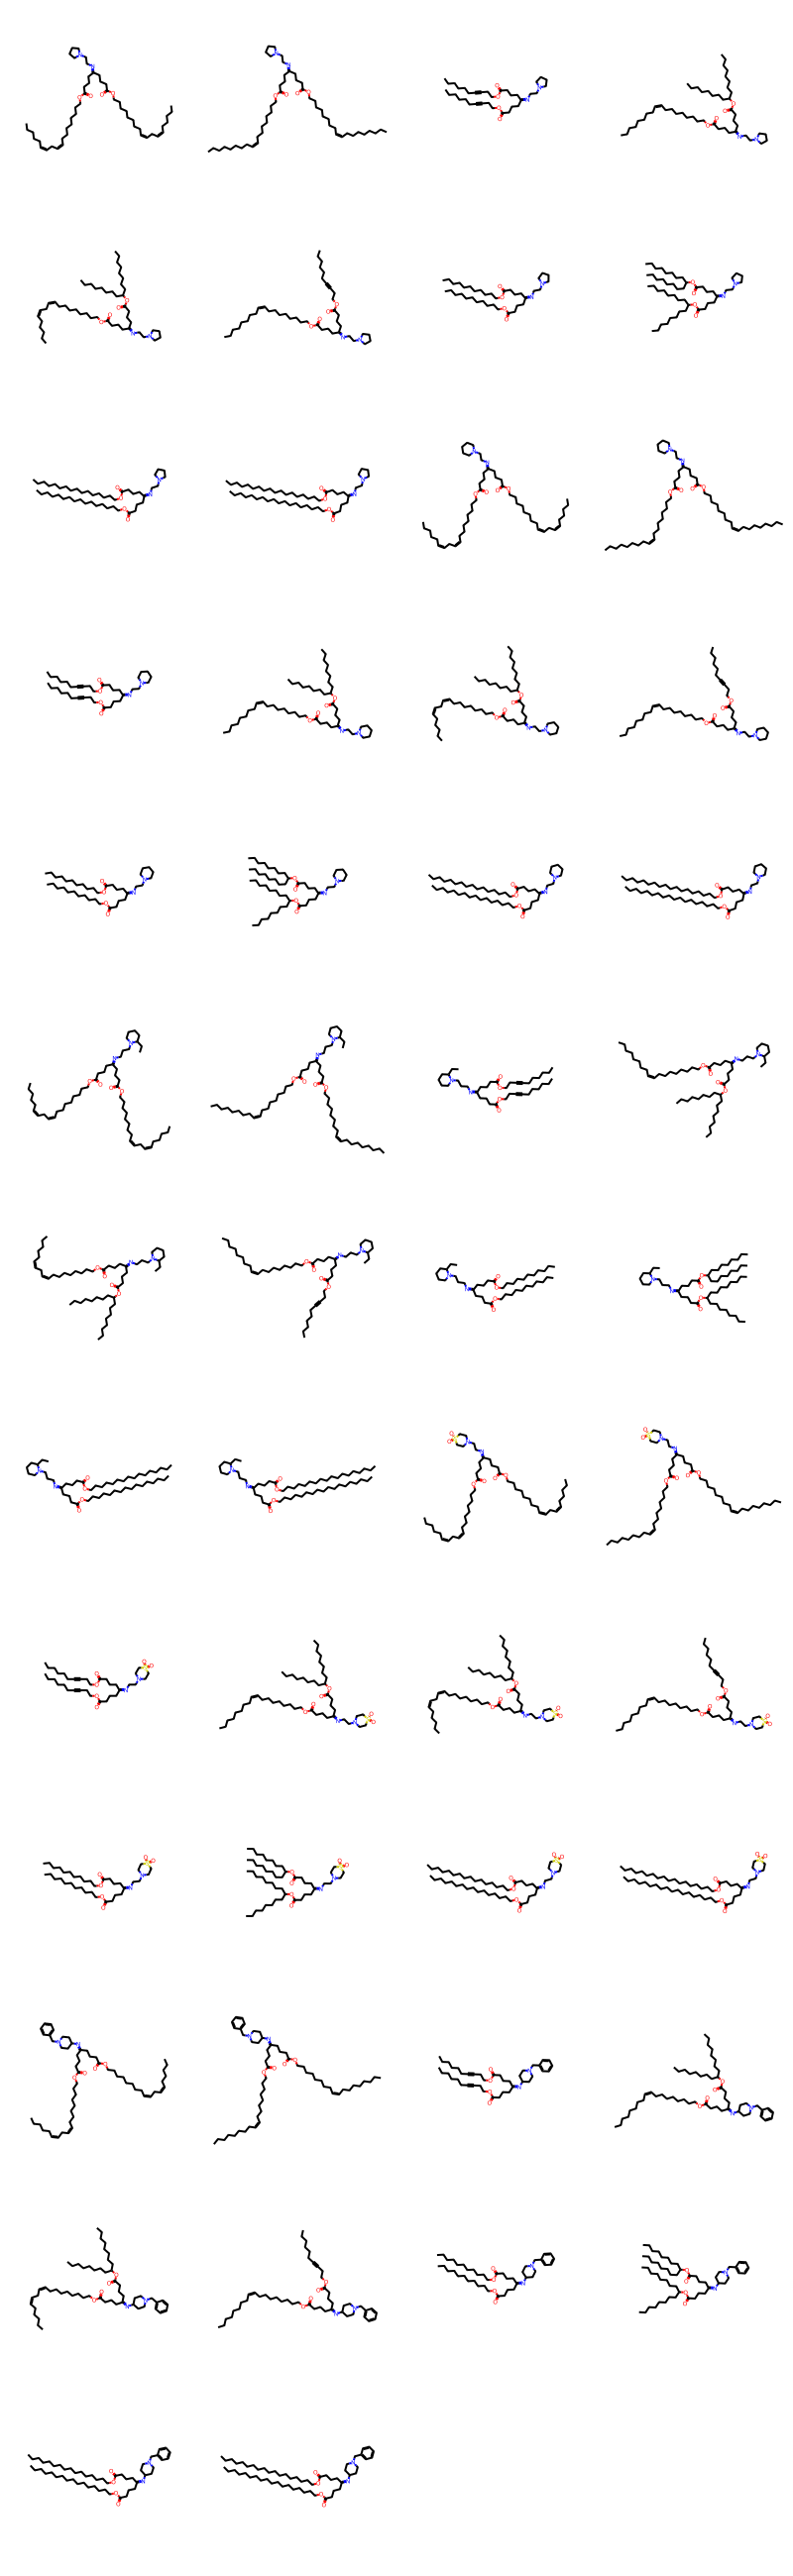

In [6]:
#-----
#imine_reaction_smarts = "[CX3H0:1](=O)([CX4:2])([CX4:3]).[NH2:4] >> [CX3H0:1](=[N:4])([CX4:2])([CX4:3])"

#imine_reaction_smarts = "[C:1][C:2](=O)[C:3].[NH2:4] >> [C:1][C:2]([=N4])[C:3]"
# 正确版本
imine_reaction_smarts = "[C:1]-[C:2](=O)-[C:3].[NH2:4] >> [C:1]-[C:2](=[N:4])-[C:3]"

rxn_imine = AllChem.ReactionFromSmarts(imine_reaction_smarts)


# ============ 3. Step 1: 生成亚胺 ============

imine_products = []  # 存储 (产物mol, 产品编号) 的元组


for amine_smiles, amine_code in amine_head_list:
    mol_amine = Chem.MolFromSmiles(amine_smiles)
    if not mol_amine:
        print(f"[警告] 无效胺: {amine_smiles}，编号: {amine_code}")
        continue

    for aldehyde_smiles, tail1_code in Tail_1_list:
        mol_aldehyde = Chem.MolFromSmiles(aldehyde_smiles)
        if not mol_aldehyde:
            print(f"[警告] 无效醛: {aldehyde_smiles}，编号: {tail1_code}")
            continue

        # 运行 Step 1 反应：末端醛 + 伯胺 → 亚胺
        products_step1 = rxn_imine.RunReactants((mol_aldehyde, mol_amine))
        if not products_step1:
            continue

        for prod_tuple in products_step1:
            for prod_mol in prod_tuple:
                try:
                    Chem.SanitizeMol(prod_mol)
                    # 生成产品编号，例如 "h1_ta1"（胺编号_醛编号）
                    product_code = f"{amine_code}_{tail1_code}"
                    imine_products.append((prod_mol, product_code))
                except Exception as e:
                    print(f"[错误] 亚胺产物 {Chem.MolToSmiles(prod_mol)} 处理失败，错误: {e}")
                    continue

print(f"\nStep 1 生成亚胺数: {len(imine_products)}")
if len(imine_products) == 0:
    print("【提示】由于没有匹配到末端醛(-CHO)与伯胺(-NH2)，无法生成亚胺。")


imine_products, inter_names = process_and_save_products(imine_products, "imine_products")

In [9]:

# 固定的 rxn_2 SMARTS（确保无电荷版本），不能更改
rxn_2_smarts = "[C:1]=[N:2].[C-:3]#[N+:4]>>[N:2]-[C:1]-[C:3]=[N:4]"

#rxn_2_smarts = "[C:1]-[C:2]=[N:3].[C-:4]#[N+:5]>>[C:1]-[C:2](-[N:3])=[C:4]=[N:5]"

rxn_2 = AllChem.ReactionFromSmarts(rxn_2_smarts)
print("[检查点] 已创建反应对象 rxn_2")

step2_products = []  # 存储 (产物mol, 产品编号) 的元组

# 使用 zip 同时遍历 imine_products 和 inter_names（即第一步产物及其编号）
for imine_mol, imine_code in zip(imine_products, inter_names):
    if imine_mol is None:
        print(f"[警告] 亚胺反应物为空，跳过编号 {imine_code}")
        continue

    imine_smiles = Chem.MolToSmiles(imine_mol, isomericSmiles=True)
    #print(f"[检查点] 正在处理亚胺反应物：{imine_smiles}，编号：{imine_code}")

    for iso_smiles, iso_code in isocyanide_linker_list:
        mol_iso = Chem.MolFromSmiles(iso_smiles)
        if not mol_iso:
            print(f"[警告] 异腈 SMILES '{iso_smiles}' 解析失败，跳过。")
            continue

        #print(f"[检查点] 正在处理异腈：{iso_smiles}，编号：{iso_code}")

        # 运行 rxn_2 反应（亚胺 + 异腈）
        products_step2 = rxn_2.RunReactants((imine_mol, mol_iso))
        if not products_step2:
            print("[提示] 反应未生成产物，继续下一个组合。")
            continue

        for ptuple in products_step2:
            for prod_mol in ptuple:
                # 去除所有原子的电荷（设为中性）
                for atom in prod_mol.GetAtoms():
                    if atom.GetFormalCharge() != 0:
                        atom.SetFormalCharge(0)
                # 重新标准化分子结构（不清洗分子属性）
                try:
                    Chem.SanitizeMol(
                        prod_mol,
                        sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES,
                    )
                except Exception as e:
                    print(f"[错误] 标准化分子失败: {Chem.MolToSmiles(prod_mol)}，错误: {e}")
                    continue

                product_smiles = Chem.MolToSmiles(prod_mol, isomericSmiles=True)
                # 生成产品编号，例如 "imine_code_iso_code"
                product_code = f"{imine_code}_{iso_code}"
                step2_products.append((prod_mol, product_code))
                #print(f"[检查点] 产物已添加: {product_smiles}，编号：{product_code}")

print(f"\nStep 2 产物数: {len(step2_products)}")



[检查点] 已创建反应对象 rxn_2

Step 2 产物数: 7380


[step2_products] 原产物数: 7380, 去重后: 7380
[step2_products] 产物 SMILES 列表 (去重后):
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCC(=O)OC(C)(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NC(C)(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NC1CCCCC1)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCCCCCC/C=C\CCCCCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCN(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCN(CCCC)CCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCCCN(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NC12CC3CC(CC(C3)C1)C2)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCC

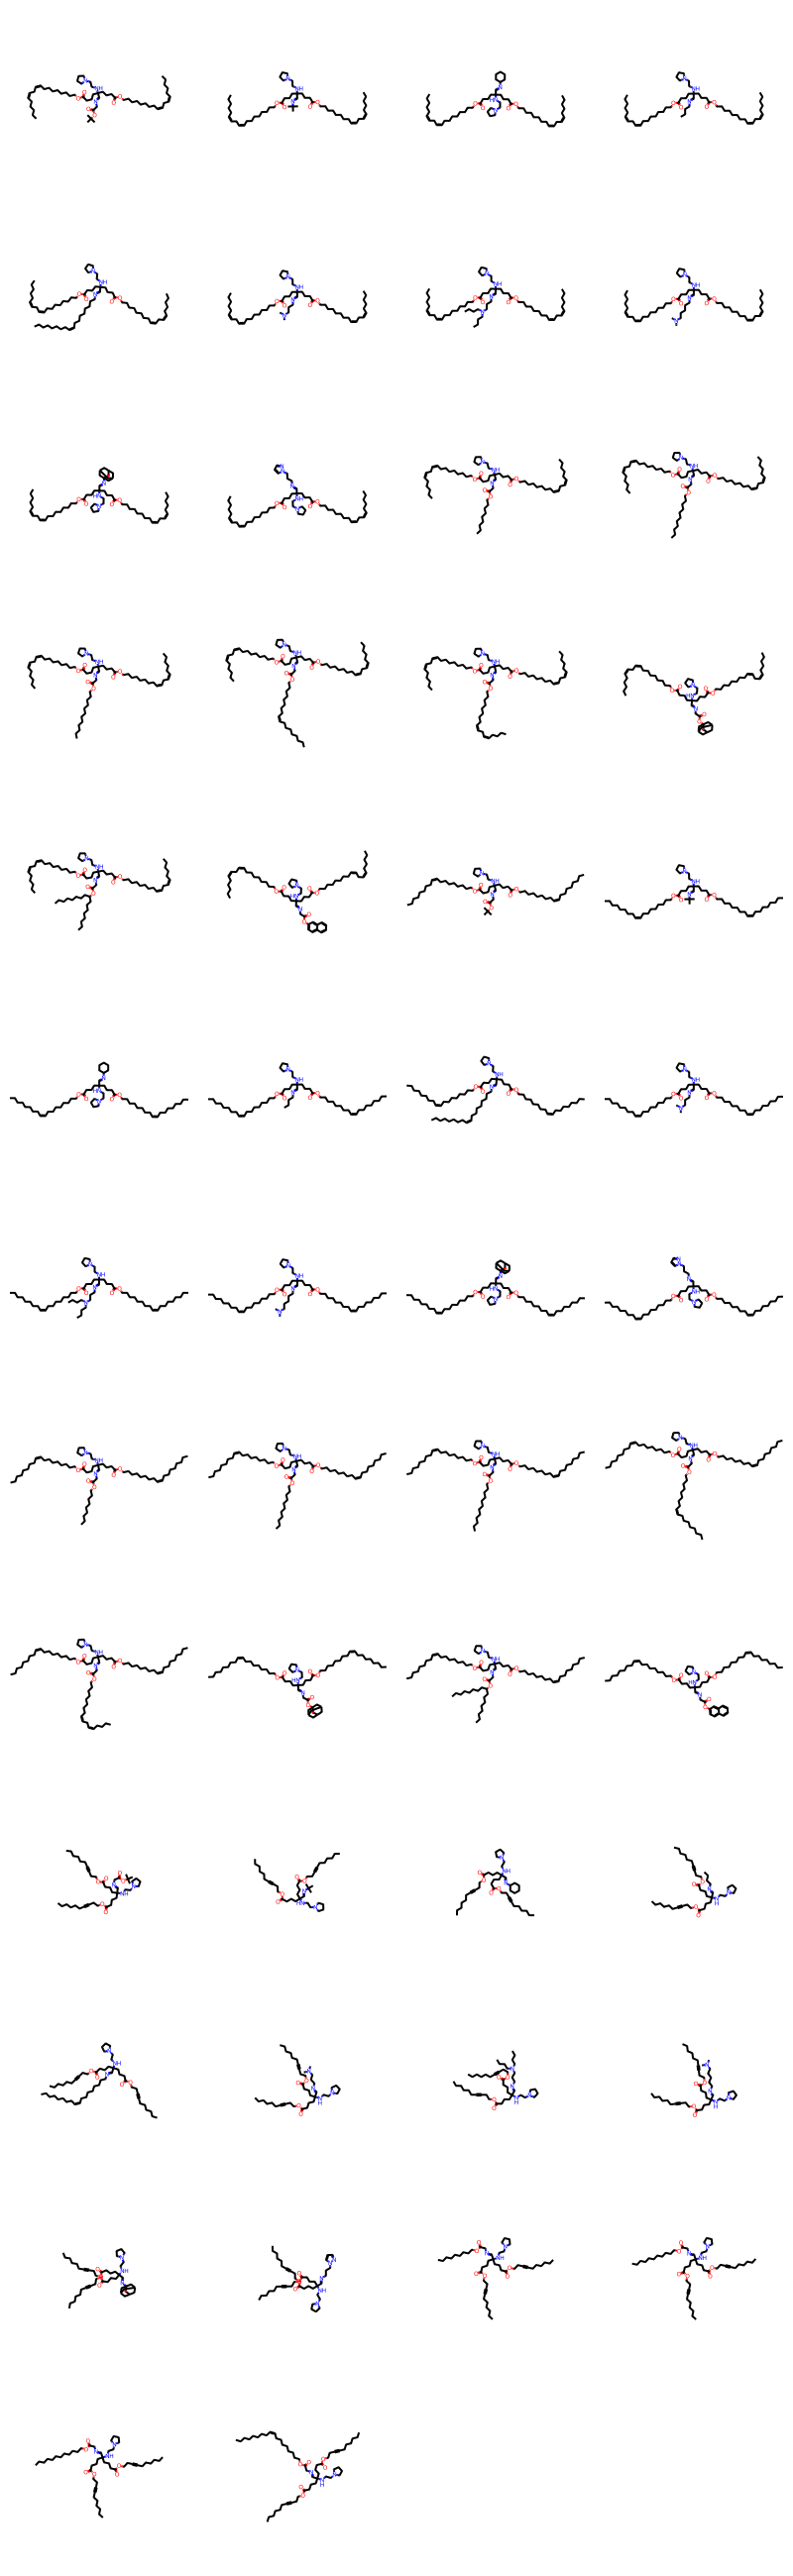

In [10]:
step2_products, inter_names = process_and_save_products(step2_products, "step2_products")


Step 2 产物数: 7380
[step2_products] 原产物数: 7380, 去重后: 7380
[step2_products] 产物 SMILES 列表 (去重后):
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCC(=O)OC(C)(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NC(C)(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NC1CCCCC1)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCCCCCC/C=C\CCCCCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCC(=O)OCCCCCCCCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCC(=O)OCCCCCCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCC(=O)OCCCCCCCCCCCC)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCCC1
   CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(C=NCCCN(C)C)(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)NCCN1CCC

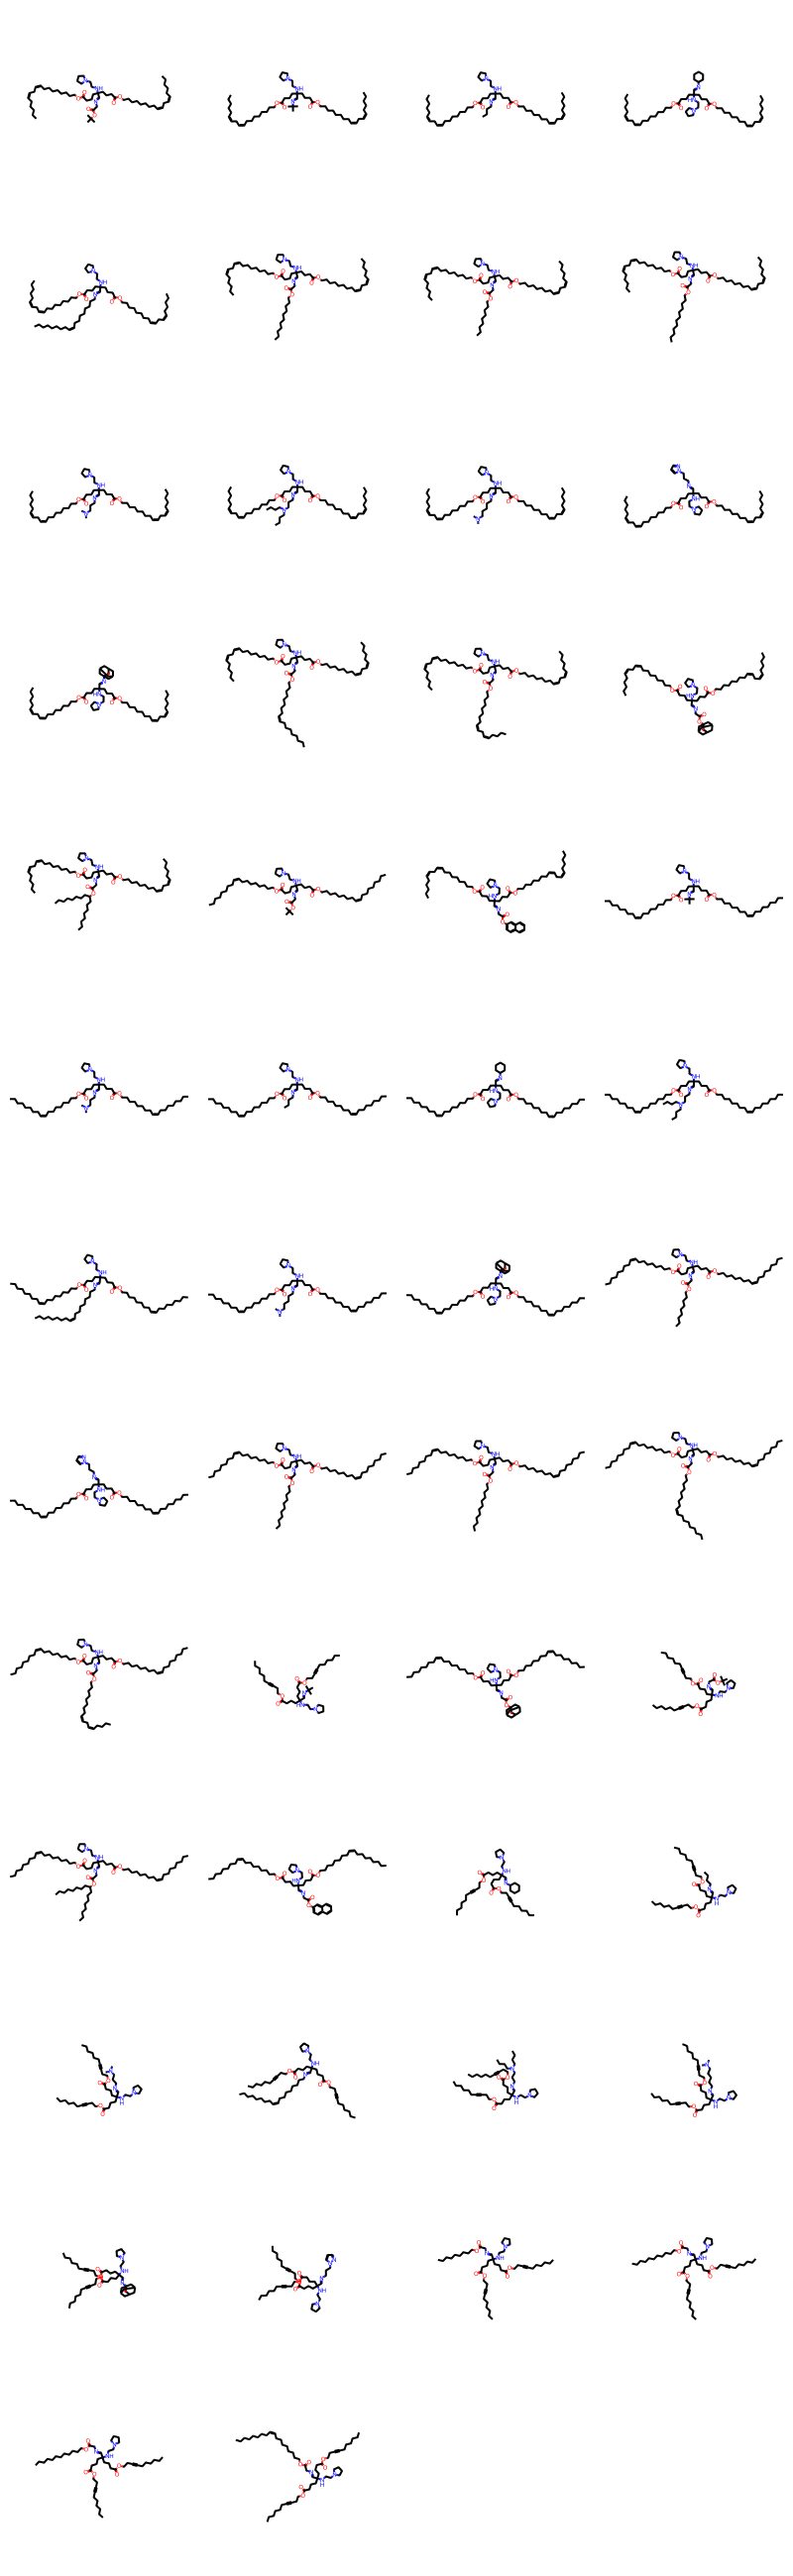

In [8]:
from concurrent.futures import ProcessPoolExecutor, as_completed
from rdkit import Chem
from rdkit.Chem import AllChem

# 由用户指定 CPU 核心数量

num_cores = 10

# 固定的 rxn_2 SMARTS（确保无电荷版本），不能更改
rxn_2_smarts = "[C:1]=[N:2].[C-:3]#[N+:4]>>[N:2]-[C:1]-[C:3]=[N:4]"

def process_reaction(args):
    # 为了避免序列化问题，在每个进程中重新创建反应对象
    rxn_2 = AllChem.ReactionFromSmarts(rxn_2_smarts)
    
    imine_mol, imine_code, iso_smiles, iso_code = args
    results = []
    
    if imine_mol is None:
        print(f"[警告] 亚胺反应物为空，跳过编号 {imine_code}")
        return results

    mol_iso = Chem.MolFromSmiles(iso_smiles)
    if not mol_iso:
        print(f"[警告] 异腈 SMILES '{iso_smiles}' 解析失败，跳过。")
        return results

    # 运行 rxn_2 反应（亚胺 + 异腈）
    products_step2 = rxn_2.RunReactants((imine_mol, mol_iso))
    if not products_step2:
        print("[提示] 反应未生成产物，继续下一个组合。")
        return results

    for ptuple in products_step2:
        for prod_mol in ptuple:
            # 去除所有原子的电荷（设为中性）
            for atom in prod_mol.GetAtoms():
                if atom.GetFormalCharge() != 0:
                    atom.SetFormalCharge(0)
            # 重新标准化分子结构（不清洗分子属性）
            try:
                Chem.SanitizeMol(
                    prod_mol,
                    sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES,
                )
            except Exception as e:
                print(f"[错误] 标准化分子失败: {Chem.MolToSmiles(prod_mol)}，错误: {e}")
                continue
            # 生成产品编号，例如 "imine_code_iso_code"
            product_code = f"{imine_code}_{iso_code}"
            results.append((prod_mol, product_code))
    return results

# 构造所有任务的参数列表
all_tasks = []
for imine_mol, imine_code in zip(imine_products, inter_names):
    for iso_smiles, iso_code in isocyanide_linker_list:
        all_tasks.append((imine_mol, imine_code, iso_smiles, iso_code))

step2_products = []  # 存储 (产物mol, 产品编号) 的元组

# 使用 ProcessPoolExecutor 并行处理任务，核心数量由用户指定
with ProcessPoolExecutor(max_workers=num_cores) as executor:
    futures = [executor.submit(process_reaction, args) for args in all_tasks]
    for future in as_completed(futures):
        try:
            result = future.result()
            step2_products.extend(result)
        except Exception as exc:
            print(f"[错误] 任务产生异常: {exc}")

print(f"\nStep 2 产物数: {len(step2_products)}")

step2_products, inter_names = process_and_save_products(step2_products, "step2_products")


[检查点] ✅ 已创建第三步反应对象 rxn_3

[检查点] 第二步反应产物数量: 7380


[10:09:59] product 1 has no mapped atoms.



Step 3 产物数: 181440


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Ex

[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C

[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:06] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(C)=O
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(=O)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(=O)CCCCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(=O)CCCCCCC/C=C\CCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)C(=O)CCCCCCC/C=C\C/C=C\CCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCC

[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCC#CCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCC#CCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)CCCCCCCCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)CCCCCCCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)CCCCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC2C3CC4CC(C3)CC2C4)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(=O)C(CCCCCC)CCCCCCCC)CCNC1C(=O)NC1CCCCC1
[警告] 无法从 SMILES 解析: CCCCCCC#CCCOC(=O)CCCC(CCCC(=O)OCCC#CCCCCCC)=NCCN1(C(C)=O)CCNC1C(

[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 36 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCCCCCC)CCNC1C

[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 28 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC2C3CC4CC(C3)CC2C4)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=

[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 51 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(

[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom # 44 N, 4, is greater than permitted
[10:12:07] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)C(=O)CCCCCCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)C(=O)CCCCCCCCC
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)C(=O)CCCCC(=O)OC1C2CC3CC(C2)CC1C3
[警告] 无法从 SMILES 解析: CCCC/C=C\C/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCC#CCCCCCC)CCCC(=O)OCCCCCCCC/C=C\CCCCCCCC)C(=O)C(CCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)

[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 15 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 14 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 38 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 23 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 23 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCC)CCCC(=O)OCCCCCCCC

[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 15 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 14 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 23 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCCCCCCCC(=O)N1(CCN=C(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCCCCCCC(=O)N1(CCN=C(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCCCC(=O)N1(CCN=C(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCCC(CCCCCCCC)OC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)CCCCC(=O)OC2C3CC4CC(C3)CC2C4)CCNC1C(=O)NCC(=O)OC12CC3CC(CC(C3)C1)C2
[警告] 无法从 SMILES 解析: CCCCCCCCC(CCCCCCCC)OC(=O)CCCC(CCCC(=O)OC(CCCCCCCC)CCCCCCCC)=NCCN1(C(=O)C(CCCCCC)CCC

[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 48 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OCCCCCCCC/C=C\CCCCCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OCCCCCCCC/C=C\CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)C(=O)CCCCCCCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)C(=O)CCCCCCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)C(=O)CCCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)C(=O)CCCCC(=O)OC1C2CC3CC(C2)CC1C3
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCC)C(=O)C(CCCCCC

[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 19 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom # 52 N, 4, is greater than permitted
[10:12:08] Explicit valence for atom #

[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)C(C)=O
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)C(=O)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)C(=O)CCCCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCCCCC/C=C\CCCCCCCCOC(=O)CNC(=O)C1NCCN1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)C(=O)CCCCCCC/C=C\CCCCCCCC
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCNC1C(=O)NCC(=O)OCCCCCCCC/C=C\CCCCCCCC
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCCC(=O)OCCCCCCCCCCCCCCCCCC)CCNC1C(=O)NCC

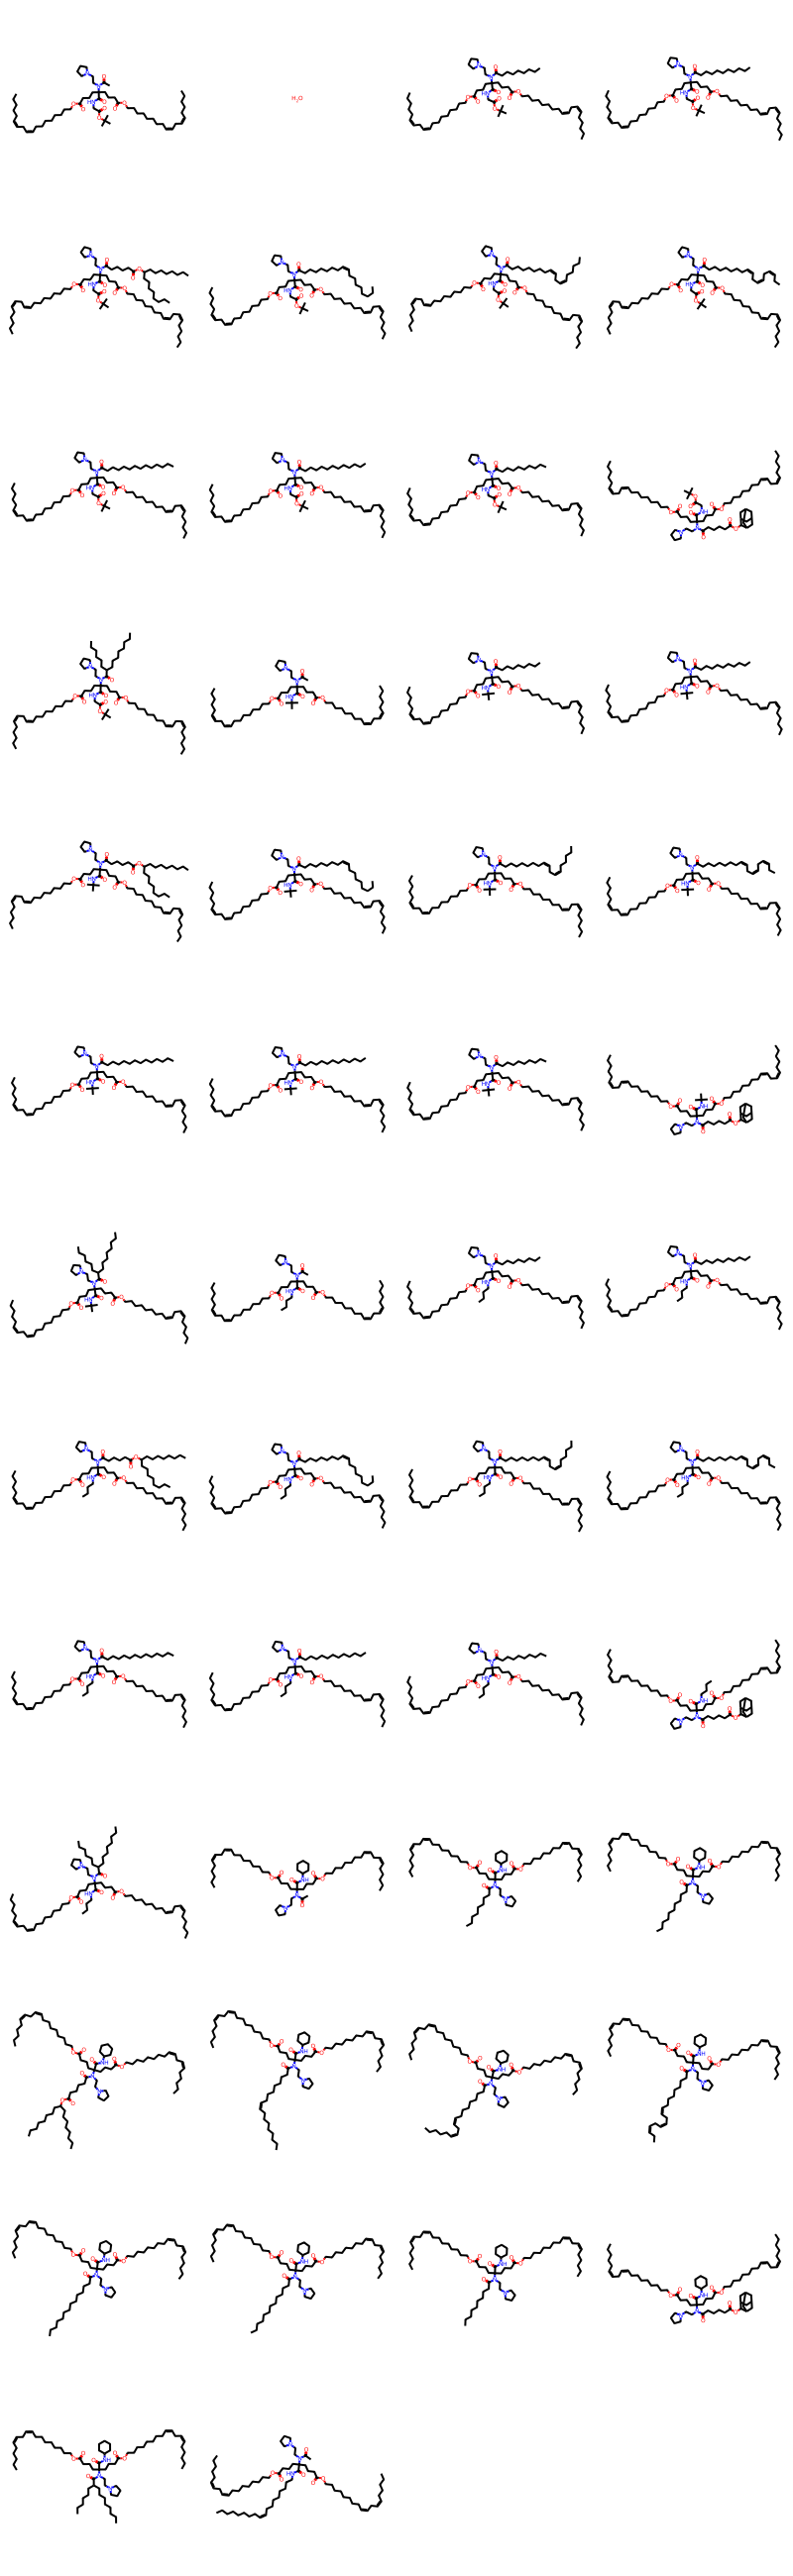

In [11]:
'''#单CPU核心测试代码
from rdkit import Chem
from rdkit.Chem import AllChem

# === 第三步反应 SMARTS，进行 Ugi 最终酰胺化、Mumm 重排 ===
rxn_3_smarts = '[N:1]-[C:2]-[C:3]=[N:4].[C:5](=[O:6])[O;H].[O:7]>>[C:2](-[C:3](=[O:7])-[N:4])-[N:1]-[C:5](=[O:6]).[O]'  # 最终SMARTS

rxn_3 = AllChem.ReactionFromSmarts(rxn_3_smarts)
print("\n[检查点] ✅ 已创建第三步反应对象 rxn_3\n")

water_smiles = 'O'  # 水
water = Chem.MolFromSmiles(water_smiles)

step3_products = []  # 存储 (产物mol, 产品编号) 的元组

# 检查 step2 产物列表
print(f"[检查点] 第二步反应产物数量: {len(step2_products)}")
if len(step2_products) == 0:
    print("[❗错误] step2_products 为空，无法继续第三步反应！")

# 使用 zip 同时遍历 step2_products 和 inter_names
for intermediate, inter_code in zip(step2_products, inter_names):
    if intermediate is None:
        print(f"[警告] 中间体为空，跳过编号 {inter_code}")
        continue

    interm_smiles = Chem.MolToSmiles(intermediate, isomericSmiles=True)
    # print(f"[检查点] 正在处理中间体：{interm_smiles}，编号：{inter_code}")

    for acid_smiles, acid_code in Tail_2_list:
        mol_acid = Chem.MolFromSmiles(acid_smiles)
        if not mol_acid:
            print(f"[警告] 羧酸 SMILES '{acid_smiles}' 解析失败，跳过。")
            continue

        # print(f"[检查点] 正在处理羧酸：{acid_smiles}，编号：{acid_code}")

        # 运行 rxn_3 反应（中间体 + 羧酸 + 水）
        products_step3 = rxn_3.RunReactants((intermediate, mol_acid, water))
        if not products_step3:
            print("[提示] 反应未生成产物，继续下一个组合。")
            continue

        for ptuple in products_step3:
            for prod_mol in ptuple:
                # 去除所有原子的电荷（设为中性）
                for atom in prod_mol.GetAtoms():
                    if atom.GetFormalCharge() != 0:
                        atom.SetFormalCharge(0)
                # 重新标准化分子结构（不清洗分子属性）
                try:
                    Chem.SanitizeMol(
                        prod_mol,
                        sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES,
                    )
                except Exception as e:
                    print(f"[错误] 标准化分子失败: {Chem.MolToSmiles(prod_mol)}，错误: {e}")
                    continue

                product_smiles = Chem.MolToSmiles(prod_mol, isomericSmiles=True)
                # 生成产品编号，例如 "inter_code_acid_code"
                product_code = f"{inter_code}_{acid_code}"
                step3_products.append((prod_mol, product_code))
                # print(f"[检查点] 产物已添加: {product_smiles}，编号：{product_code}")

print(f"\nStep 3 产物数: {len(step3_products)}")

step3_products, final_names = process_and_save_products(step3_products, "step3_final_products")
'''


[检查点] ✅ 已创建第三步反应对象 rxn_3

[检查点] 第二步反应产物数量: 7380

Step 3 产物数: 181440


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C

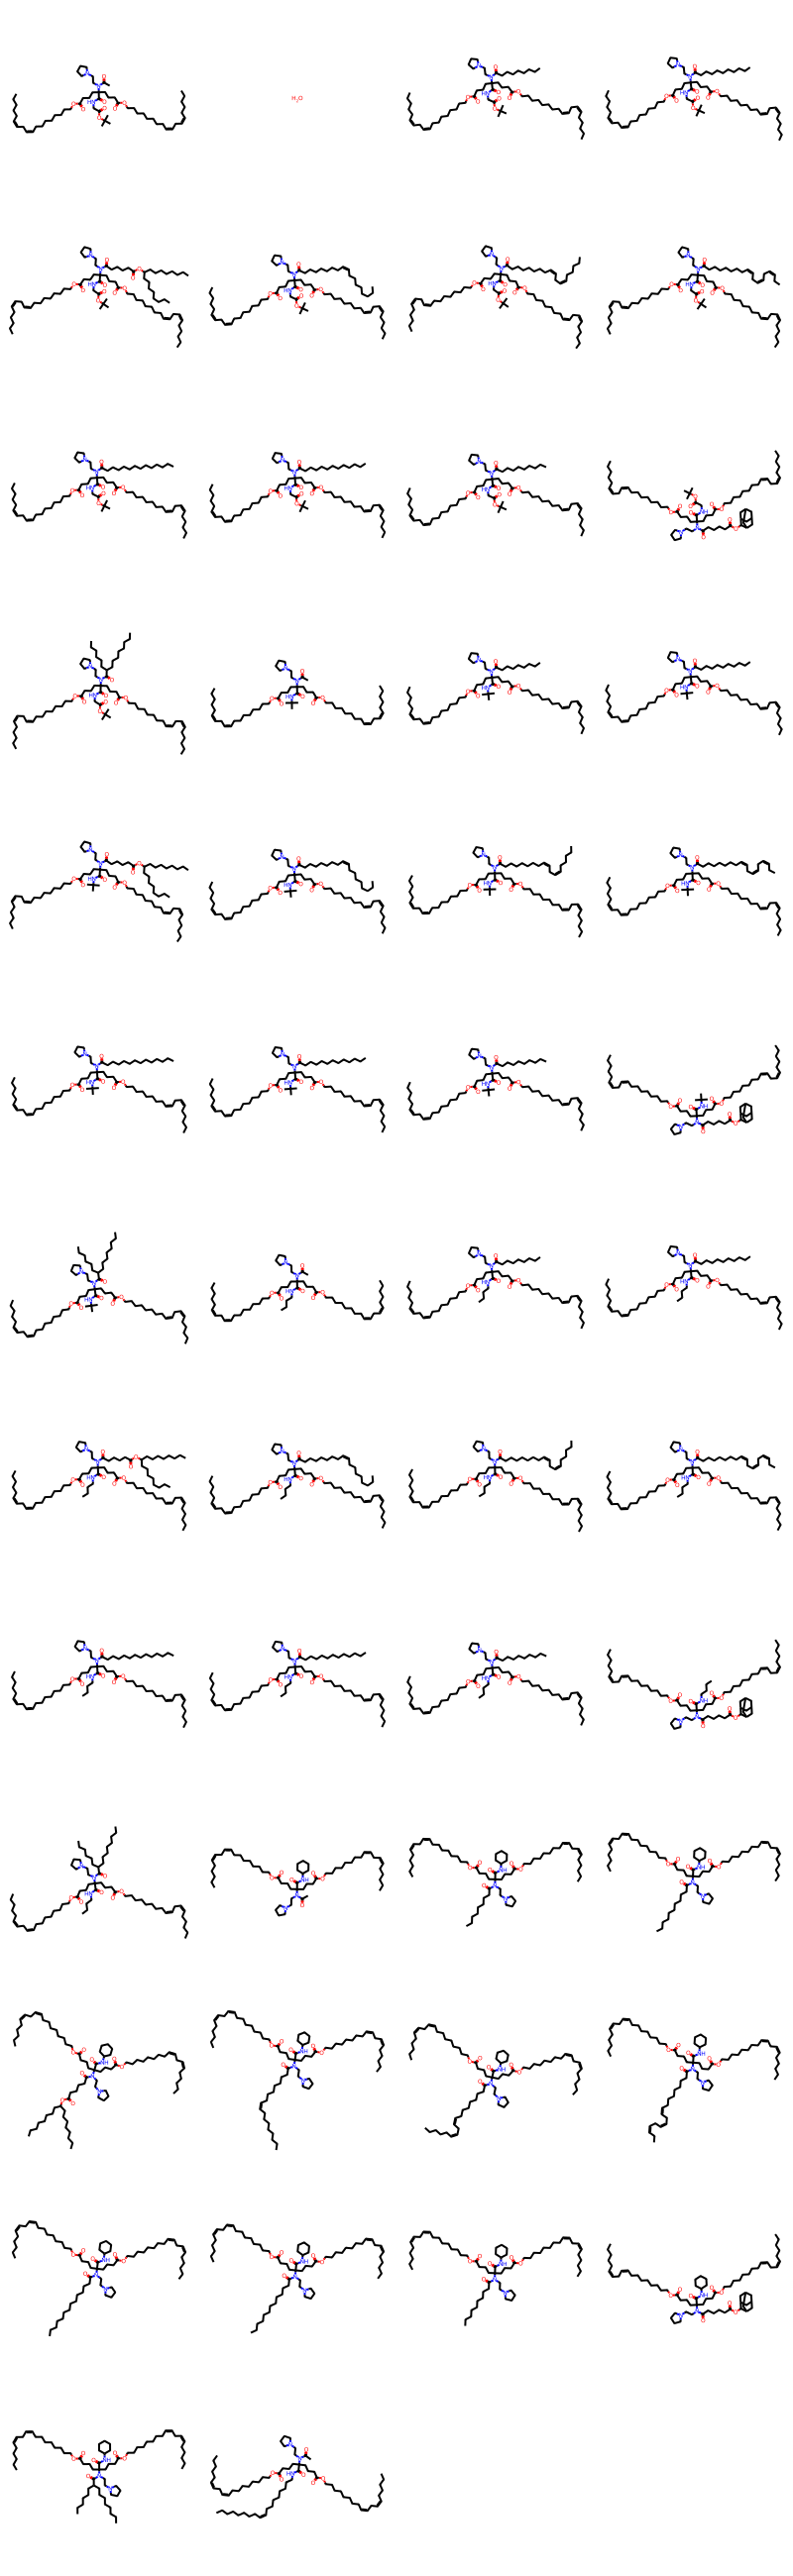

In [12]:
'''#测试代码 忽略
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDLogger

# 关闭 RDKit 内部警告，避免输出 "product 1 has no mapped atoms" 等信息
RDLogger.DisableLog('rdApp.*')

# === 第三步反应 SMARTS，进行 Ugi 最终酰胺化、Mumm 重排 ===
rxn_3_smarts = '[N:1]-[C:2]-[C:3]=[N:4].[C:5](=[O:6])[O;H].[O:7]>>[C:2](-[C:3](=[O:7])-[N:4])-[N:1]-[C:5](=[O:6]).[O]'  # 最终SMARTS
rxn_3 = AllChem.ReactionFromSmarts(rxn_3_smarts)
print("\n[检查点] ✅ 已创建第三步反应对象 rxn_3\n")

water_smiles = 'O'  # 水
water = Chem.MolFromSmiles(water_smiles)

step3_products = []  # 存储 (产物mol, 产品编号) 的元组

# 检查 step2 产物列表
print(f"[检查点] 第二步反应产物数量: {len(step2_products)}")
if len(step2_products) == 0:
    print("[❗错误] step2_products 为空，无法继续第三步反应！")

# 使用 zip 同时遍历 step2_products 和 inter_names
for intermediate, inter_code in zip(step2_products, inter_names):
    if intermediate is None:
        continue  # 跳过空中间体，无输出提示
    # 遍历羧酸列表（Tail_2_list，每个元素为 (acid_smiles, acid_code)）
    for acid_smiles, acid_code in Tail_2_list:
        mol_acid = Chem.MolFromSmiles(acid_smiles)
        if not mol_acid:
            continue  # 跳过解析失败的羧酸
        # 运行第三步反应（中间体 + 羧酸 + 水）
        products_step3 = rxn_3.RunReactants((intermediate, mol_acid, water))
        if not products_step3:
            continue  # 无产物生成则跳过
        for ptuple in products_step3:
            for prod_mol in ptuple:
                # 去除所有原子的电荷（设为中性）
                for atom in prod_mol.GetAtoms():
                    if atom.GetFormalCharge() != 0:
                        atom.SetFormalCharge(0)
                # 尝试标准化分子结构
                try:
                    Chem.SanitizeMol(
                        prod_mol,
                        sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES,
                    )
                except Exception as e:
                    continue
                # 生成产品编号，例如 "inter_code_acid_code"
                product_code = f"{inter_code}_{acid_code}"
                step3_products.append((prod_mol, product_code))

print(f"\nStep 3 产物数: {len(step3_products)}")

# 对第三步产物进一步处理和保存
step3_products, final_names = process_and_save_products(step3_products, "step3_final_products")
'''


[检查点] ✅ 已定义第三步反应 SMARTS

[检查点] 第二步反应产物数量: 7380

Step 3 产物数: 181440


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(C)=O)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCC(=O)OC(CCCCCCCC)CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\CCCCCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C\C/C=C\CCCCCCCCOC(=O)CCCC(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)=NCCN1(C(=O)CCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N1(CCN=C(CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCCC(=O)OCCCCCCCC/C=C\C/C=C\CCCCC)CCNC1C(=O)NC(C)(C)C
[警告] 无法从 SMILES 解析: CCCCC/C=C

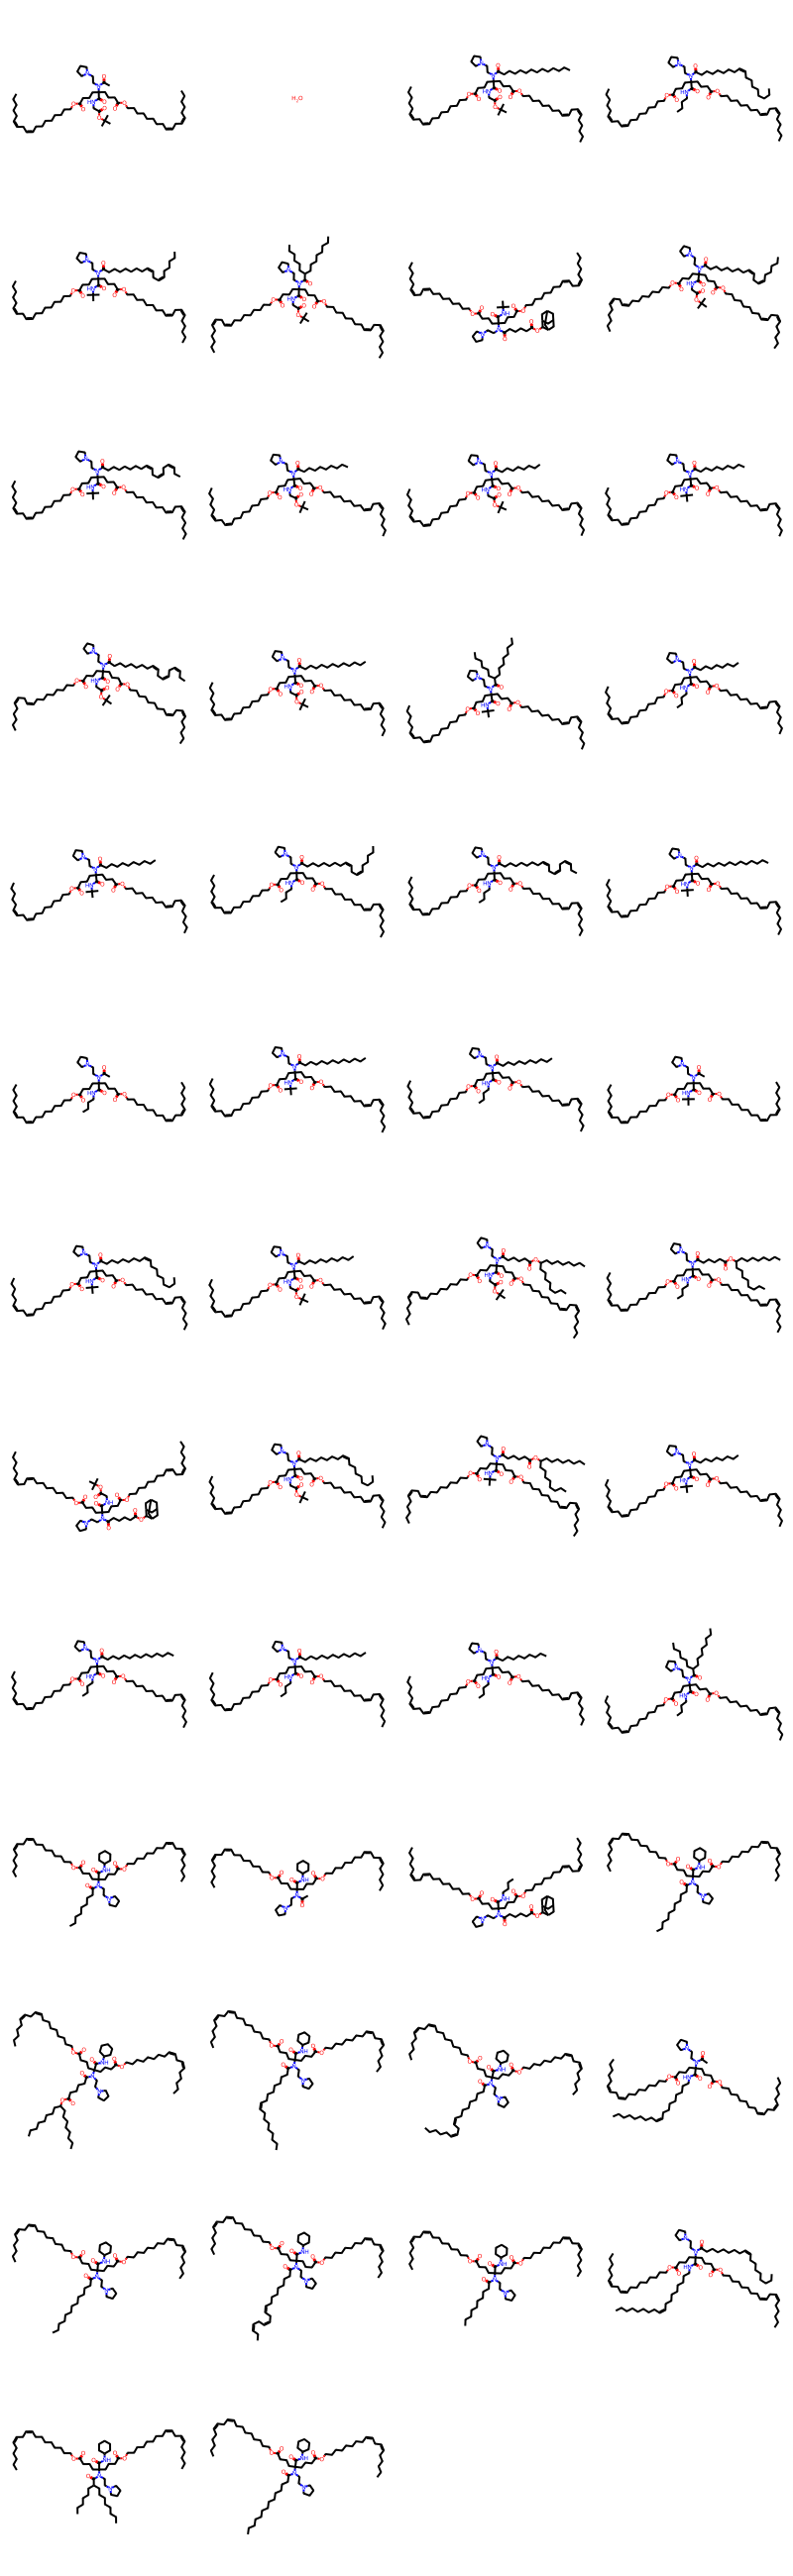

In [15]:
import sys
import contextlib
from concurrent.futures import ProcessPoolExecutor, as_completed
from rdkit import Chem
from rdkit.Chem import AllChem

# 用户指定使用的 CPU 核心数（可直接修改该变量）
num_cores = 10

# 定义警告日志文件
log_filename = "rdkit_warnings.log"

# === 第三步反应 SMARTS，进行 Ugi 最终酰胺化、Mumm 重排 ===
rxn_3_smarts = '[N:1]-[C:2]-[C:3]=[N:4].[C:5](=[O:6])[O;H].[O:7]>>[C:2](-[C:3](=[O:7])-[N:4])-[N:1]-[C:5](=[O:6]).[O]'
# 注意：由于 RDKit 对象（如反应对象）可能无法跨进程传递，因此在每个工作进程中重新构建
print("\n[检查点] ✅ 已定义第三步反应 SMARTS\n")

def process_reaction_step3_worker(task):
    """
    处理单个中间体与羧酸反应任务：
      输入参数 task 为一个四元组 (intermediate, inter_code, acid_smiles, acid_code)
      返回该组合反应生成的所有 (产物mol, 产品编号) 的列表
    """
    intermediate, inter_code, acid_smiles, acid_code = task
    results = []
    
    # 在每个子进程中重定向 RDKit 警告到文件
    with open(log_filename, "a") as log_file:
        with contextlib.redirect_stderr(log_file):
            # 创建第三步反应对象（避免序列化问题）
            rxn_3 = AllChem.ReactionFromSmarts(rxn_3_smarts)
            # 为保证每个子进程都有水分子，内部生成水对象
            water = Chem.MolFromSmiles("O")
            # 将羧酸 SMILES 转换为 Mol
            mol_acid = Chem.MolFromSmiles(acid_smiles)
            if not mol_acid:
                return results  # 羧酸解析失败，返回空列表
            # 运行第三步反应（中间体 + 羧酸 + 水）
            products_step3 = rxn_3.RunReactants((intermediate, mol_acid, water))
    
    if not products_step3:
        return results  # 没有生成产物，返回空列表

    # 对生成的每个产物进行处理
    for ptuple in products_step3:
        for prod_mol in ptuple:
            # 去除所有原子的电荷（设为中性）
            for atom in prod_mol.GetAtoms():
                if atom.GetFormalCharge() != 0:
                    atom.SetFormalCharge(0)
            # 重新标准化分子结构（不清洗分子属性）
            try:
                Chem.SanitizeMol(
                    prod_mol,
                    sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_PROPERTIES,
                )
            except Exception as e:
                # 如果标准化失败，则忽略该产物
                continue
            # 生成产品编号，例如 "inter_code_acid_code"
            product_code = f"{inter_code}_{acid_code}"
            results.append((prod_mol, product_code))
    return results

# 检查 step2 产物列表（此处假设 step2_products 与 inter_names 已由 process_and_save_products 得到，且二者长度一致）
print(f"[检查点] 第二步反应产物数量: {len(step2_products)}")
if len(step2_products) == 0:
    print("[❗错误] step2_products 为空，无法继续第三步反应！")

# 构造所有任务：对于每个中间体（以及对应编号）和每个羧酸组合生成一个任务
all_tasks = []
for intermediate, inter_code in zip(step2_products, inter_names):
    for acid_smiles, acid_code in Tail_2_list:
        all_tasks.append((intermediate, inter_code, acid_smiles, acid_code))

# 使用 ProcessPoolExecutor 并行处理任务
step3_products = []  # 存储 (产物mol, 产品编号) 的元组
with ProcessPoolExecutor(max_workers=num_cores) as executor:
    futures = [executor.submit(process_reaction_step3_worker, task) for task in all_tasks]
    for future in as_completed(futures):
        try:
            result = future.result()
            step3_products.extend(result)
        except Exception as exc:
            print(f"[错误] 任务产生异常: {exc}")

print(f"\nStep 3 产物数: {len(step3_products)}")

# 对第三步产物进一步处理和保存
step3_products, final_names = process_and_save_products(step3_products, "step3_final_products")


In [17]:
'''#测试代码
import os
import csv
from rdkit import Chem
from rdkit.Chem import Draw
import concurrent.futures

def process_row(row, png_folder, mol_folder):
    """
    处理单行CSV数据：生成RDKit分子，保存PNG图片和MOL文件。
    返回一个处理状态字符串。
    """
    # 获取编号、名称和SMILES（根据实际CSV标题调整）
    mol_id = row.get("编号", "").strip()
    mol_name = row.get("名称", "").strip()
    smiles = row.get("SMILES", "").strip()
    
    if not smiles:
        return "空的SMILES，跳过此行。"
    
    # 使用RDKit从SMILES生成分子
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return f"无法解析 SMILES: {smiles}，跳过。"
    
    # 尝试进行化学有效性检查
    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        return f"分子 {smiles} 清洗失败: {e}，跳过。"
    
    # 构造文件名前缀：优先使用编号和名称，例如“h1_l1_t1”
    if mol_id and mol_name:
        prefix = f"{mol_id}_{mol_name}"
    else:
        prefix = mol_id or mol_name or "molecule"
    # 清除空格和特殊字符，确保文件名安全
    prefix = "".join(c for c in prefix if c.isalnum() or c in ['-', '_'])
    if not prefix:
        prefix = "molecule"
    
    # 为了避免文件名冲突，可以考虑加入其他唯一标识，这里简单使用前缀
    png_filename = os.path.join(png_folder, f"{prefix}.png")
    try:
        Draw.MolToFile(mol, png_filename, size=(300, 300))
    except Exception as e:
        print(f"保存PNG失败: {e}")
    
    mol_filename = os.path.join(mol_folder, f"{prefix}.mol")
    try:
        Chem.MolToMolFile(mol, mol_filename)
    except Exception as e:
        print(f"保存MOL文件失败: {e}")
    
    return f"处理完成: {prefix}"

def process_csv(csv_filename, num_workers=None):
    """
    读取CSV文件（包含标题行），标题至少包含："编号"、"名称"、"SMILES"。
    对每一行生成RDKit分子，并将PNG图片和MOL文件分别保存到新建的文件夹 "png_files" 和 "mol_files" 中。
    使用多进程加速处理，可以通过 num_workers 指定使用的CPU核心数量（默认使用所有可用核心）。
    """
    # 创建用于保存PNG和MOL文件的文件夹
    png_folder = "png_0327"
    mol_folder = "mol_0327"
    os.makedirs(png_folder, exist_ok=True)
    os.makedirs(mol_folder, exist_ok=True)
    
    # 读取CSV所有行
    with open(csv_filename, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        rows = list(reader)
    
    # 使用ProcessPoolExecutor并行处理每一行
    results = []
    with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
        # 提交所有任务
        futures = [executor.submit(process_row, row, png_folder, mol_folder) for row in rows]
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            results.append(result)
            print(result)
    
    print("全部处理完成。")
    return results

# 示例调用，使用X个CPU核心处理
if __name__ == "__main__":
    process_csv("step3_final_products_products.csv", num_workers=20)
'''

处理完成: 2_a1_k1_i1_c1
处理完成: 1_a1_k1_i1_c1
处理完成: 4_a1_k1_i4_c5
处理完成: 3_a1_k1_i1_c8
处理完成: 14_a1_k1_i1_c9
处理完成: 5_a1_k1_i2_c6
处理完成: 8_a1_k1_i1_c6
处理完成: 22_a1_k1_i2_c9
处理完成: 21_a1_k1_i4_c1
处理完成: 17_a1_k1_i2_c3
处理完成: 11_a1_k1_i1_c2
处理完成: 16_a1_k1_i4_c2
处理完成: 7_a1_k1_i2_c11
处理完成: 20_a1_k1_i2_c8
处理完成: 13_a1_k1_i1_c7
处理完成: 10_a1_k1_i1_c10
处理完成: 19_a1_k1_i4_c7
处理完成: 9_a1_k1_i2_c7
处理完成: 18_a1_k1_i4_c6
处理完成: 15_a1_k1_i2_c12
处理完成: 12_a1_k1_i2_c10
处理完成: 6_a1_k1_i1_c12
处理完成: 23_a1_k1_i4_c3
处理完成: 32_a1_k1_i2_c2
处理完成: 35_a1_k1_i4_c10
处理完成: 34_a1_k1_i4_c9
处理完成: 33_a1_k1_i4_c8
处理完成: 24_a1_k1_i2_c1
处理完成: 25_a1_k1_i2_c5
处理完成: 26_a1_k1_i1_c3
处理完成: 39_a1_k1_i4_c11
处理完成: 31_a1_k1_i2_c4
处理完成: 28_a1_k1_i4_c4
处理完成: 29_a1_k1_i1_c11
处理完成: 36_a1_k1_i4_c12
处理完成: 37_a1_k1_i3_c2
处理完成: 27_a1_k1_i1_c4
处理完成: 40_a1_k1_i3_c3
处理完成: 41_a1_k1_i3_c4
处理完成: 44_a1_k1_i5_c1
处理完成: 30_a1_k1_i1_c5
处理完成: 47_a1_k1_i3_c10
处理完成: 52_a1_k1_i5_c9
处理完成: 46_a1_k1_i3_c7
处理完成: 51_a1_k1_i5_c2
处理完成: 53_a1_k1_i3_c11
处理完成: 54_a1_k1_i12_c1
处理完成: 55_a

In [18]:
import os
import csv
from rdkit import Chem
from rdkit.Chem import Draw
import concurrent.futures

def process_row(row, png_folder, mol_folder):
    """
    处理单行CSV数据：生成RDKit分子，保存PNG图片和MOL文件。
    返回一个处理状态字符串。
    """
    # 获取编号、名称和SMILES（根据实际CSV标题调整）
    mol_id = row.get("编号", "").strip()
    mol_name = row.get("名称", "").strip()
    smiles = row.get("SMILES", "").strip()
    
    if not smiles:
        return "空的SMILES，跳过此行。"
    
    # 使用RDKit从SMILES生成分子
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return f"无法解析 SMILES: {smiles}，跳过。"
    
    # 尝试进行化学有效性检查
    try:
        Chem.SanitizeMol(mol)
    except Exception as e:
        return f"分子 {smiles} 清洗失败: {e}，跳过。"
    
    # 构造文件名前缀：优先使用编号和名称，例如“h1_l1_t1”
    if mol_id and mol_name:
        prefix = f"{mol_id}_{mol_name}"
    else:
        prefix = mol_id or mol_name or "molecule"
    # 清除空格和特殊字符，确保文件名安全
    prefix = "".join(c for c in prefix if c.isalnum() or c in ['-', '_'])
    if not prefix:
        prefix = "molecule"
    
    # 保存PNG图片
    png_filename = os.path.join(png_folder, f"{prefix}.png")
    try:
        Draw.MolToFile(mol, png_filename, size=(300, 300))
    except Exception as e:
        # 如有需要，可记录错误信息到日志
        pass
    
    # 保存MOL文件
    mol_filename = os.path.join(mol_folder, f"{prefix}.mol")
    try:
        Chem.MolToMolFile(mol, mol_filename)
    except Exception as e:
        # 如有需要，可记录错误信息到日志
        pass
    
    return f"处理完成: {prefix}"

def process_csv(csv_filename, num_workers=None):
    """
    读取CSV文件（包含标题行），标题至少包含："编号"、"名称"、"SMILES"。
    对每一行生成RDKit分子，并将PNG图片和MOL文件分别保存到文件夹 "png_0327" 和 "mol_0327" 中。
    使用多进程加速处理，可通过 num_workers 指定使用的CPU核心数量（默认使用所有可用核心）。
    """
    # 创建用于保存PNG和MOL文件的文件夹
    png_folder = "png_0327"
    mol_folder = "mol_0327"
    os.makedirs(png_folder, exist_ok=True)
    os.makedirs(mol_folder, exist_ok=True)
    
    # 读取CSV所有行
    with open(csv_filename, 'r', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        rows = list(reader)
    
    results = []
    total = len(rows)
    # 使用ProcessPoolExecutor并行处理每一行
    with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = [executor.submit(process_row, row, png_folder, mol_folder) for row in rows]
        for i, future in enumerate(concurrent.futures.as_completed(futures), 1):
            try:
                res = future.result()
                results.append(res)
            except Exception as exc:
                results.append(f"任务异常: {exc}")
            # 每处理100行输出一次进度，避免每行打印
            if i % 1000 == 0 or i == total:
                print(f"已处理 {i}/{total} 行")
    
    # 输出最终汇总统计信息
    success = sum(1 for r in results if r.startswith("处理完成"))
    errors = total - success
    print(f"\n全部处理完成。总共处理 {total} 行，其中成功 {success} 行，错误或跳过 {errors} 行。")
    return results

# 示例调用，指定使用20个CPU核心处理
if __name__ == "__main__":
    process_csv("step3_final_products_products.csv", num_workers=20)


已处理 1000/88561 行
已处理 2000/88561 行
已处理 3000/88561 行
已处理 4000/88561 行
已处理 5000/88561 行
已处理 6000/88561 行
已处理 7000/88561 行
已处理 8000/88561 行
已处理 9000/88561 行
已处理 10000/88561 行
已处理 11000/88561 行
已处理 12000/88561 行
已处理 13000/88561 行
已处理 14000/88561 行
已处理 15000/88561 行
已处理 16000/88561 行
已处理 17000/88561 行
已处理 18000/88561 行
已处理 19000/88561 行
已处理 20000/88561 行
已处理 21000/88561 行
已处理 22000/88561 行
已处理 23000/88561 行
已处理 24000/88561 行
已处理 25000/88561 行
已处理 26000/88561 行
已处理 27000/88561 行
已处理 28000/88561 行
已处理 29000/88561 行
已处理 30000/88561 行
已处理 31000/88561 行
已处理 32000/88561 行
已处理 33000/88561 行
已处理 34000/88561 行
已处理 35000/88561 行
已处理 36000/88561 行
已处理 37000/88561 行
已处理 38000/88561 行
已处理 39000/88561 行
已处理 40000/88561 行
已处理 41000/88561 行
已处理 42000/88561 行
已处理 43000/88561 行
已处理 44000/88561 行
已处理 45000/88561 行
已处理 46000/88561 行
已处理 47000/88561 行
已处理 48000/88561 行
已处理 49000/88561 行
已处理 50000/88561 行
已处理 51000/88561 行
已处理 52000/88561 行
已处理 53000/88561 行
已处理 54000/88561 行
已处理 55000/88561 行
已处理 56000/88561 行
已